In [1]:
import sympy as sp
import numpy as np

from kaa.model import Model
from models.vanderpol import VanDerPol, VanDerPol_UnitBox
from models.sir import SIR_UnitBox, SIR
from models.harosc import HarOsc

from kaa.bundle import BundleMode
from kaa.settings import PlotSettings
from kaa.timer import Timer

from kaa.reach import ReachSet
from kaa.plotutil import Plot

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat

PlotSettings.save_fig = False #Enable interactive mode


# Harmonic Oscillator PCA

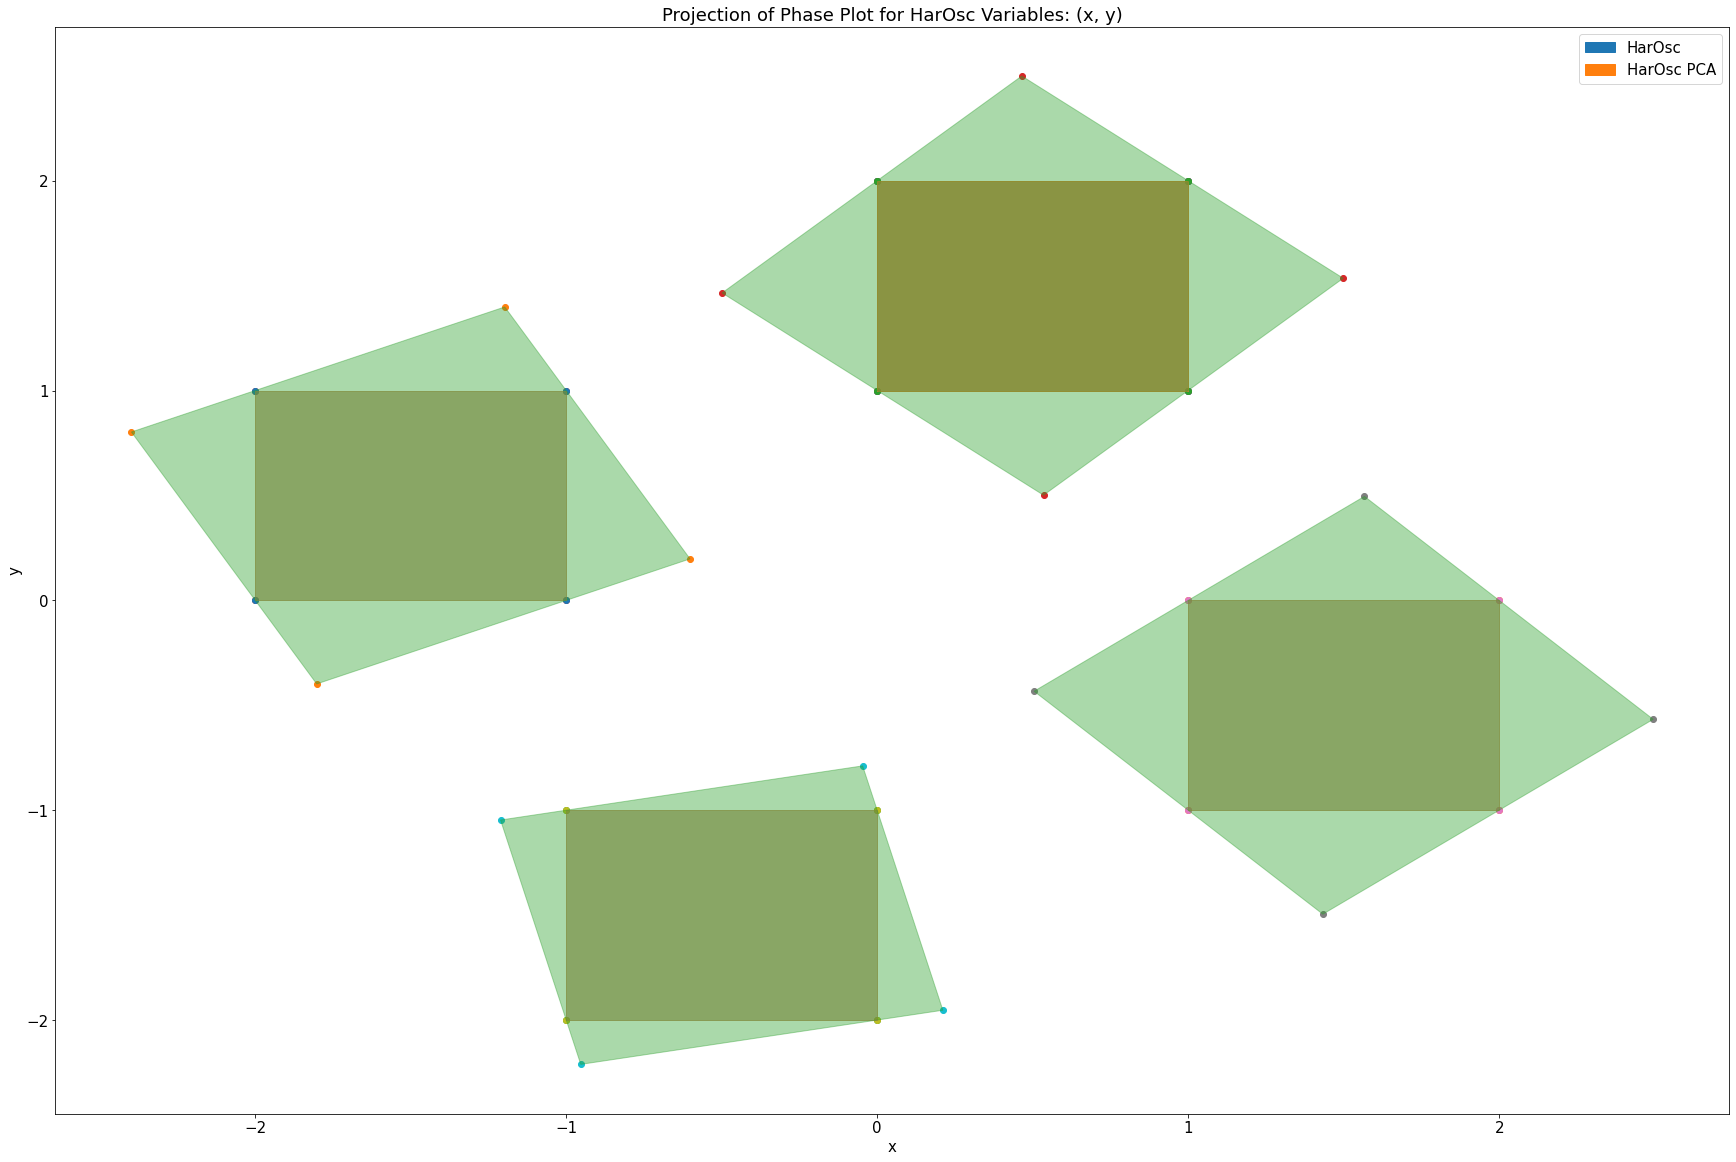

Plotting phase for dimensions x, y done -- Time Spent: 0.2770507335662842
Average Generator Procedure Duration: 0.0021484030617607962 sec
Average Functional Composition Duration: 0.0037420855628119577 sec
Average Bound Computation Duration: 0.00021448069148593478 sec
Average Reachable Set Computation Duration: 0.3750983774662018 sec
Average Phase Duration: 0.2697470188140869 sec


In [4]:
# [[0,1],[1,2]]

NUM_STEPS = 4

model = HarOsc()
mod_reach = ReachSet(model)

mod_flow = mod_reach.computeReachSet(NUM_STEPS)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1)

Timer.generate_stats()


# Harmonic Oscillator LinApprox

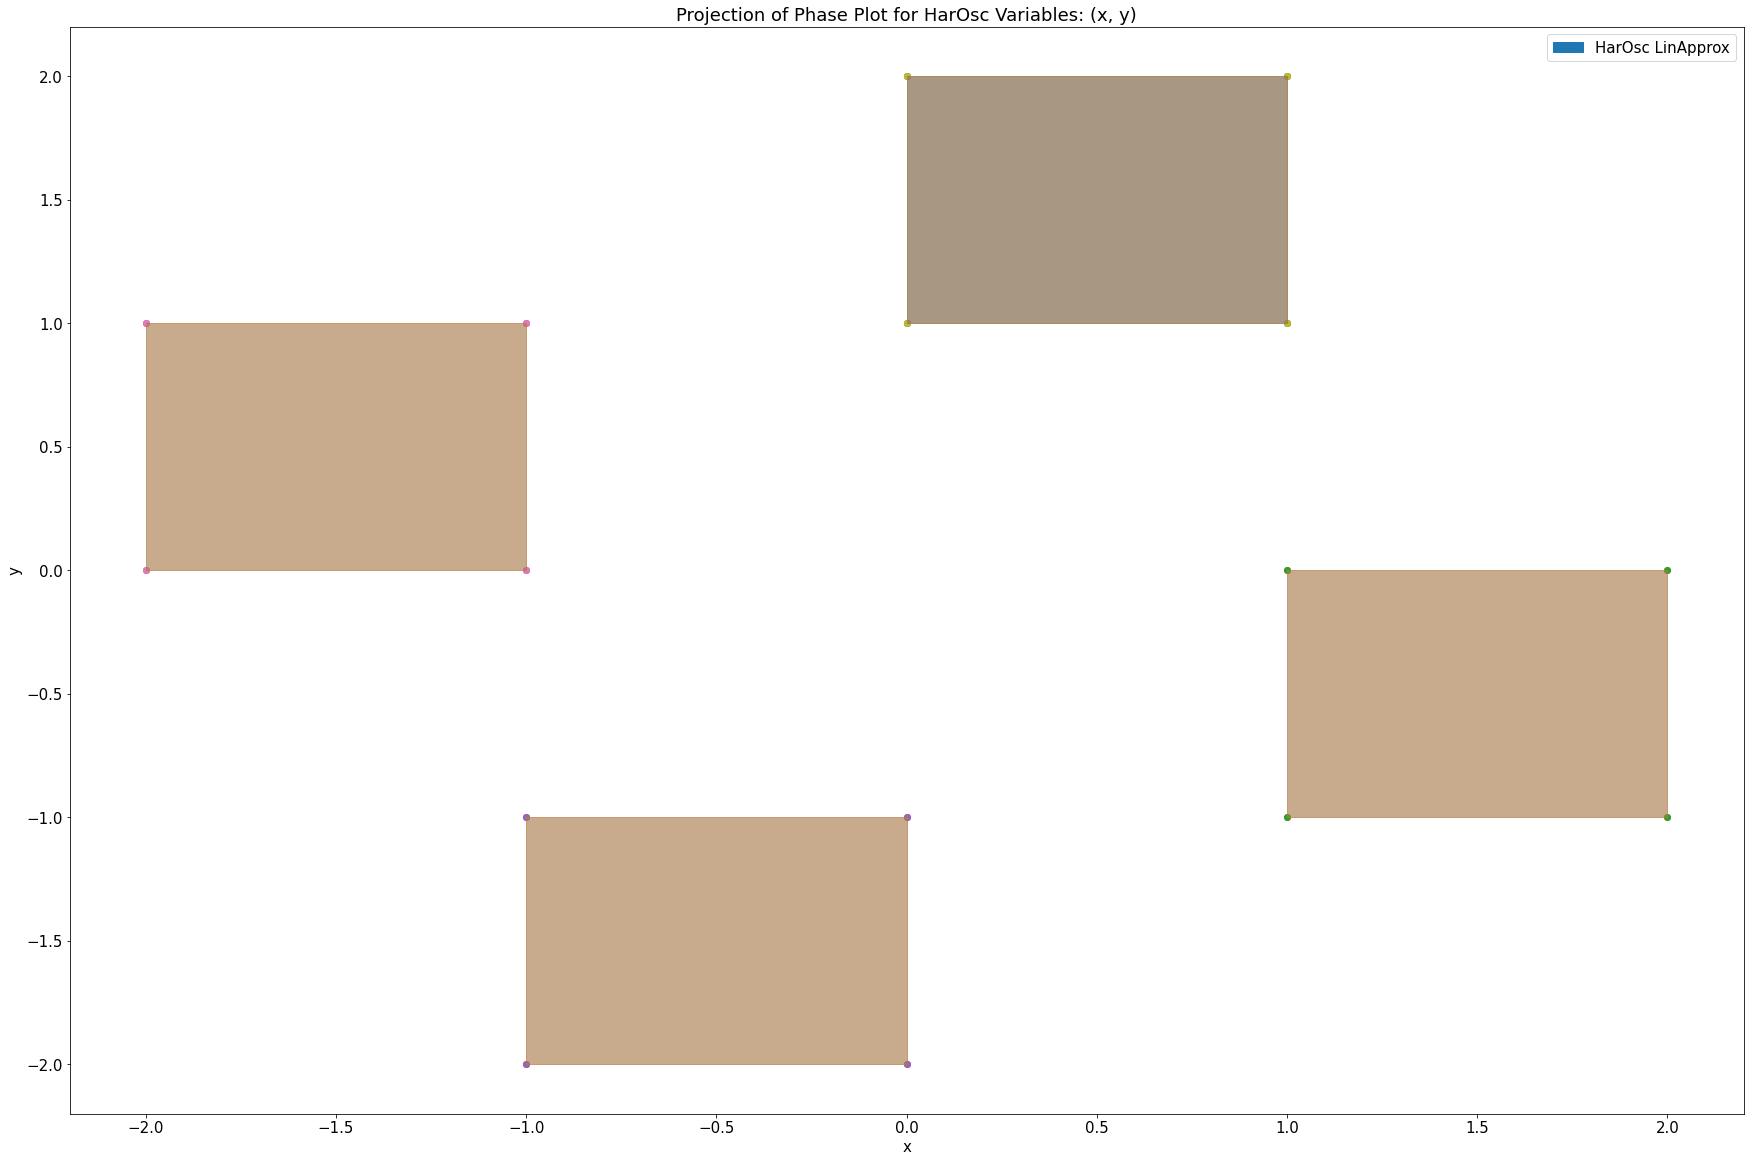

Plotting phase for dimensions x, y done -- Time Spent: 0.27601099014282227
Average Generator Procedure Duration: 0.0018796225388844807 sec
Average Functional Composition Duration: 0.0032389014959335327 sec
Average Bound Computation Duration: 0.0002130568027496338 sec
Average Reachable Set Computation Duration: 0.3633236959576607 sec
Average Phase Duration: 0.27131301164627075 sec


In [5]:
# [[0,1],[1,2]]

NUM_STEPS = 4

model = HarOsc()
mod_reach = ReachSet(model)

mod_flow = mod_reach.computeReachSet(NUM_STEPS)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.

pca_strat = LinStrat(model, iter_steps=1)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
#vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc LinApprox")
vdp_plot.plot2DPhase(0,1)

Timer.generate_stats()


# Harmonic Oscillator PCA at $\pi$/4

In [ ]:
class HarOscRotate(Model):

    def __init__(self, delta=0.05):

        x,y = sp.Symbol('x'), sp.Symbol('y')

        dx = y
        dy = -x
    
        dyns  = [dx, dy]
        vars = [x, y]

        L = np.empty([2,2])
        T = np.empty([1,2])

        L[0] = [1, 1]
        L[1] = [-1, 1]

        T[0][0] = 0;
        T[0][1] = 1;

        #T[1][0] = 2
        #T[1][1] = 3

        offu = np.empty(2)
        offl = np.empty(2)

        offu[0] = 1
        offu[1] = 2
        #offu[2] = 5
        #offu[3] = 5

        offl[0] = 0
        offl[1] = -1
        #offl[2] = 5
        #offl[3] = 5
        #
        super().__init__(dyns, vars, T, L, offu, offl, name="HarOsc")

NUM_STEPS = 4

model = HarOscRotate()
mod_reach = ReachSet(model)

mod_flow = mod_reach.computeReachSet(NUM_STEPS)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 5 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
vdp_plot.add(mod_flow, "HarOsc")
#vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1)

Timer.generate_stats()


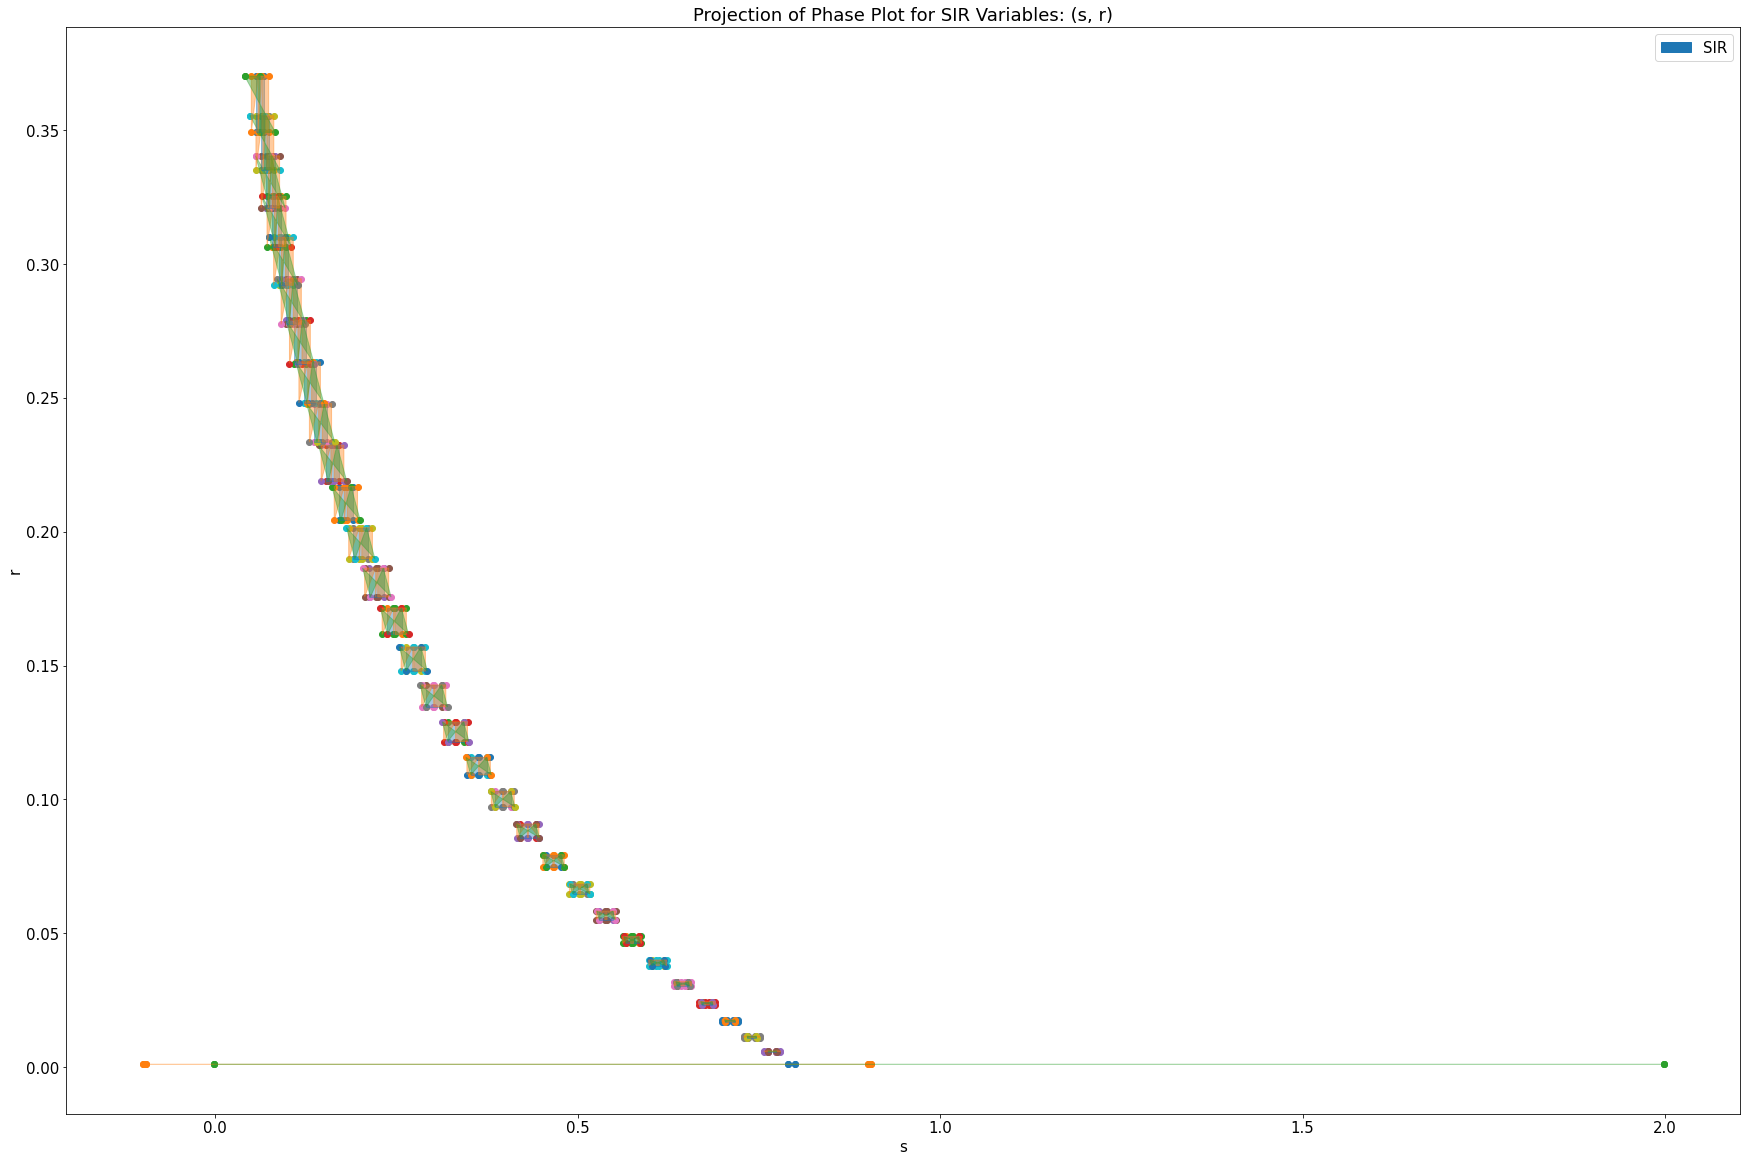

Plotting phase for dimensions s, r done -- Time Spent: 0.6088540554046631
Average Generator Procedure Duration: 0.0018361188747264721 sec
Average Functional Composition Duration: 0.007504793449684426 sec
Average Bound Computation Duration: 0.0003069823170885628 sec
Average Reachable Set Computation Duration: 0.07902220090230307 sec
Average Phase Duration: 0.6309613704681396 sec


In [7]:
NUM_STEPS = 30

model = SIR(delta=0.5)
#unit_model = VanDerPol_UnitBox()

mod_reach = ReachSet(model)
#unit_mod_reach = ReachSet(unit_model)

mod_flow = mod_reach.computeReachSet(NUM_STEPS)
#unit_mod_flow = unit_mod_reach.computeReachSet(NUM_STEPS) 

sir_plot = Plot()
sir_plot.add(mod_flow, "SIR")
#vdp_plot.add(unit_mod_flow, "SIR_UNIT")
sir_plot.plot2DPhase(0,2)

Timer.generate_stats()
